In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Theory


## Methods

We will use the photoelectric setup with three colors of lasers and a diverging lens. We start by zeroing out the detector 

In [42]:
c = 3e8

red = {
    "voltage": [390,278,152,0,-22,-54,-72,-104,-135,-192,-292],
    "current": [495,365,213,61,47,30,20,10,9,7,0]
}
lambda_red = 634.6e-9
f_red = c / lambda_red

green = {
    "voltage": [393,252,123,0,-52,-95,-147,-212,-312,-406,-511,-620],
    "current": [2958,2272,1636,1034,810,640,471,298,127,47,12,0]
}
lambda_green = 532e-9
f_green = c / lambda_green

violet = {
    "voltage": [420,290,136,0,-74,-116,-179,-380,-630,-877,-1060,-1180],
    "current": [3859,3249,2530,1891,1578,1420,1203,680,282,72,10,0]
}
lambda_violet = 405e-9
f_violet = c / lambda_violet

e = 1.60217662e-19

df_red = pd.DataFrame(red)
df_green = pd.DataFrame(green)
df_violet = pd.DataFrame(violet)

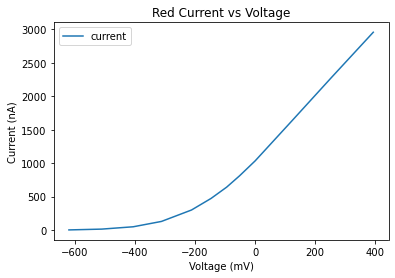

In [43]:
df_green.plot(x="voltage", y="current")
plt.title("Red Current vs Voltage")
plt.xlabel("Voltage (mV)")
plt.ylabel("Current (nA)");

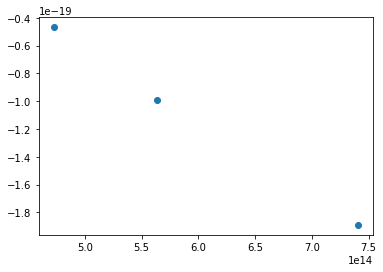

In [65]:
K_max = [x * e * 1e-3 for x in [-292, -620, -1180]]
f = [f_red, f_green, f_violet]
plt.scatter(f, K_max)

-5.2767422789873425e-34
1.2539340603097477


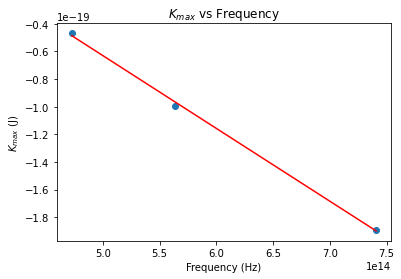

In [74]:
lr = LinearRegression()
lr.fit(np.array(f).reshape(-1, 1), K_max)

plt.scatter(f, K_max, label="Data Points")
plt.plot(f, lr.predict(np.array(f).reshape(-1, 1)), c="r", label="Linear Fit")
plt.xlabel("Frequency (Hz)")
plt.ylabel("$K_{max}$ (J)")
plt.title("$K_{max}$ vs Frequency")


print(lr.coef_[0])
print(lr.intercept_/e)

In [83]:
np.sqrt(1.5*lr.intercept_**2)/10

2.4605416377460388e-20

In [84]:
np.sqrt(1.5*lr.coef_[0]**2)/10

6.462663043844913e-35